<a href="https://colab.research.google.com/github/norliejhon/ITBAN3/blob/main/Laboratory_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib


# Define the path to your dataset directory in Google Drive
data_dir = pathlib.Path('/content/drive/My Drive/Colab Notebooks/Training Dataset/Picture')

# List image files with .jpg extension
jpg_image_paths = list(data_dir.glob('*/*.jpg'))

# List image files with .jpeg extension
jpeg_image_paths = list(data_dir.glob('*/*.jpeg'))

# Combine both lists to get paths of all image files with .jpg and .jpeg extensions
image_paths = jpg_image_paths + jpeg_image_paths

In [4]:
# Count the number of JPEG and JPEG images in subdirectories
jpeg_images = list(data_dir.glob('*/*.jpg'))
jpg_images = list(data_dir.glob('*/*.jpeg'))
image_count = len(jpeg_images) + len(jpg_images)

print("Total Number of JPG and JPEG Images:", image_count)

Total Number of JPG and JPEG Images: 111


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 111 files belonging to 2 classes.
Using 89 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 111 files belonging to 2 classes.
Using 22 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Edwin_pic', 'Norlie_pic']


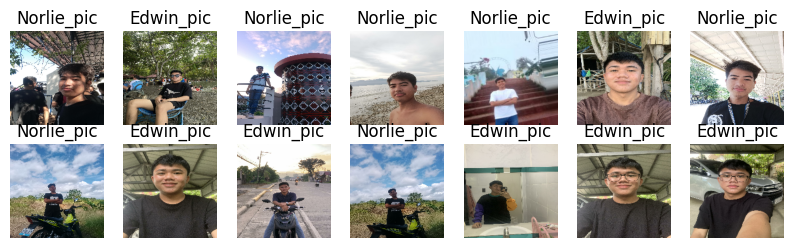

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(14):
    ax = plt.subplot(7, 7, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 26s 11s/step - loss: 1.7044 - accuracy: 0.5618 - val_loss: 2.0383 - val_accuracy: 0.3182
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 0.9904 - accuracy: 0.6292 - val_loss: 0.6405 - val_accuracy: 0.6818
Epoch 3/10
3/3 [==============================] - 3s 927ms/step - loss: 0.7158 - accuracy: 0.4831 - val_loss: 0.7520 - val_accuracy: 0.3182
Epoch 4/10
3/3 [==============================] - 2s 900ms/step - loss: 0.6164 - accuracy: 0.6180 - val_loss: 0.6198 - val_accuracy: 0.6818
Epoch 5/10
3/3 [==============================] - 2s 906ms/step - loss: 0.5587 - accuracy: 0.7528 - val_loss: 0.5473 - val_accuracy: 0.6818
Epoch 6/10
3/3 [==============================] - 2s 811ms/step - loss: 0.4202 - accuracy: 0.9213 - val_loss: 0.5839 - val_accuracy: 0.7727
Epoch 7/10
3/3 [==============================] - 4s 2s/step - loss: 0.3764 - accuracy: 0.8202 - val_loss: 0.4567 - val_accuracy: 0.6818
Epoch 8/10
3/3 [===========

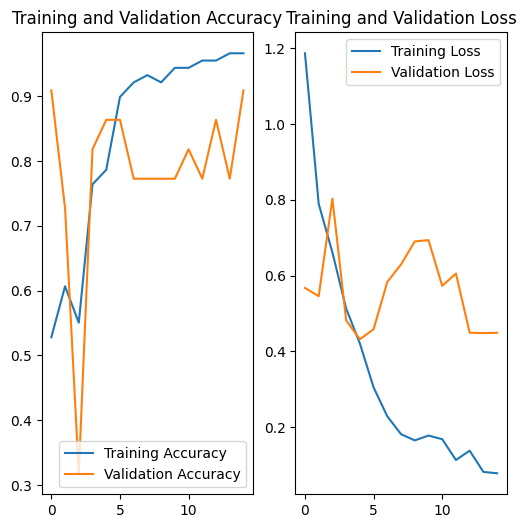

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

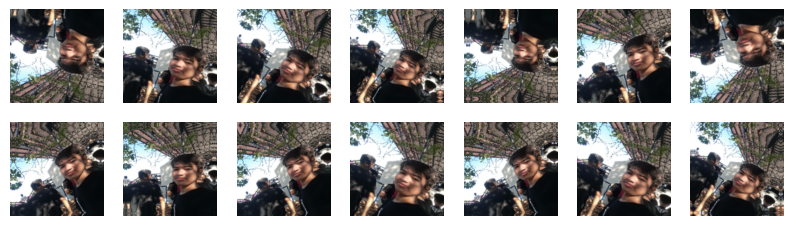

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(14):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(7, 7, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [21]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [24]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
3/3 [==============================] - 5s 1s/step - loss: 1.1871 - accuracy: 0.5281 - val_loss: 0.5673 - val_accuracy: 0.9091
Epoch 2/15
3/3 [==============================] - 5s 2s/step - loss: 0.7896 - accuracy: 0.6067 - val_loss: 0.5456 - val_accuracy: 0.7273
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6610 - accuracy: 0.5506 - val_loss: 0.8033 - val_accuracy: 0.3182
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5130 - accuracy: 0.7640 - val_loss: 0.4820 - val_accuracy: 0.8182
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.4208 - accuracy: 0.7865 - val_loss: 0.4318 - val_accuracy: 0.8636
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.3047 - accuracy: 0.8989 - val_loss: 0.4583 - val_accuracy: 0.8636
Epoch 7/15
3/3 [==============================] - 3s 973ms/step - loss: 0.2282 - accuracy: 0.9213 - val_loss: 0.5834 - val_accuracy: 0.7727
Epoch 8/15
3/3 [======================

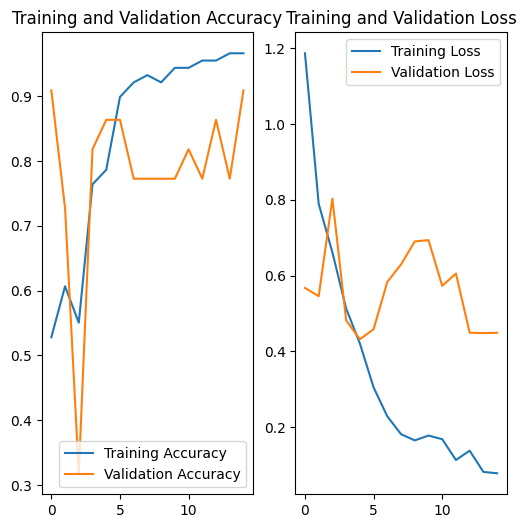

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the path to your image in Google Drive
Norlie_pic_path = '/content/drive/My Drive/Colab Notebooks/Training Dataset/Picture/Norlie_pic/IMG_20240109_132725_HDR.jpg'

# Load and preprocess the image
img = image.load_img(Norlie_pic_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make predictions using the trained model
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Retrieve class names from the model (make sure you have defined `class_names` based on your dataset)
class_names = ['Edwin_pic', 'Norlie_pic']  # Replace with your actual class names

# Display prediction results
print("This picture is belongs to {} with accuracy rate of {:.2f}%."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))


1/1 [==============================] - 0s 140ms/step
This picture is belongs to Norlie_pic with accuracy rate of 99.95%.


In [27]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [28]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [29]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [30]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In [31]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [32]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [33]:
print(
    "This image is belongs to {} with accuracy rate of {:.2f} percent."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image is belongs to Norlie_pic with accuracy rate of 99.95 percent.


In [34]:
print(np.max(np.abs(predictions - predictions_lite)))

1.1920929e-06


In [37]:
#My picture to test (Norlie Jhon Malagdao)
picture_path = '/content/drive/MyDrive/Colab Notebooks/Training Dataset/MyPic_toTest/mypic.jpg'

img = tf.keras.utils.load_img(
    picture_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is belongs to {} with accuracy rate of {:.2f} percent."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 31ms/step
This image is belongs to Norlie_pic with accuracy rate of 91.27 percent.


In [38]:
#My pair picture to test (Edwin Manganaan)
picture_path = '/content/drive/MyDrive/Colab Notebooks/Training Dataset/MyPair_toTest/mypair.jpeg'

img = tf.keras.utils.load_img(
    picture_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is belongs to {} with accuracy rate of {:.2f} percent."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 48ms/step
This image is belongs to Edwin_pic with accuracy rate of 99.62 percent.


In [43]:
#Unknown picture to test
picture_path = '/content/drive/MyDrive/Colab Notebooks/Training Dataset/UnknownPic/image.jpeg'

img = tf.keras.utils.load_img(
    picture_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is belongs to {} with accuracy rate of {:.2f} percent."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 30ms/step
This image is belongs to Edwin_pic with accuracy rate of 99.87 percent.
